In [2]:
from scipy.signal import freqz, group_delay
import numpy as np
import matplotlib.pyplot as plt


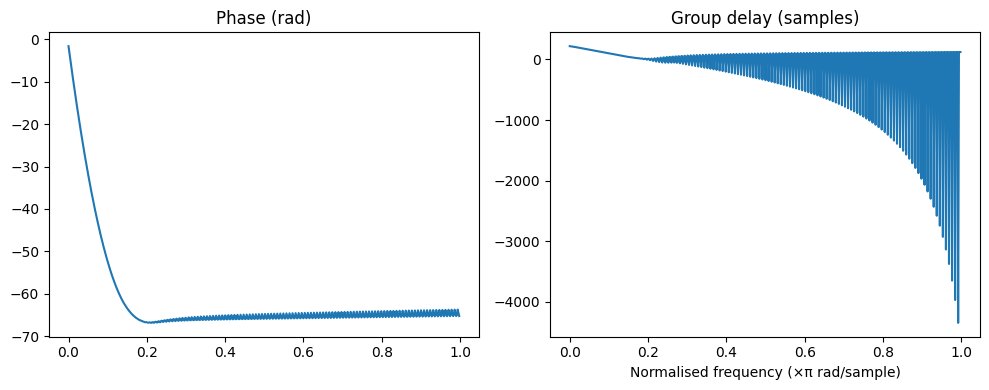

In [ ]:
N = 256                       # tap count
a = -0.0025                   # quadratic coefficient (rad/sample^2)
b = 20 * np.pi / N            # linear coefficient (rad/sample)
n0 = (N-1)/2                  # center sample  (keeps causality easy)

n = np.arange(N) - n0
h = np.exp(1j*(0.5*a*(n**2) + b*n))        # pure chirp
h *= np.kaiser(N, beta=6.5)                # window to control sidelobes

w, H  = freqz(h)                      # frequency response
w, tg = group_delay((h, 1))           # group delay (samples)

plt.figure(figsize=(10,4))
plt.subplot(121); plt.plot(w/np.pi, np.unwrap(np.angle(H))); plt.title('Phase (rad)')
plt.subplot(122); plt.plot(w/np.pi, tg); plt.title('Group delay (samples)'); plt.xlabel('Normalised frequency (×π rad/sample)')
plt.tight_layout()